# Model IDM Interpretation

Indeks Desa Membangun adalah sebuah indeks komposit yang dibentuk dari indeks Ketahanan Sosial (IKS), Indeks Ketahanan Ekonomi (IKE) dan Indeks Ketahanan Lingkungan (IKLs). Dari ketiga indeks tersebut IKS dan IKL memungkinkan untuk diamati melalui citra satelit.

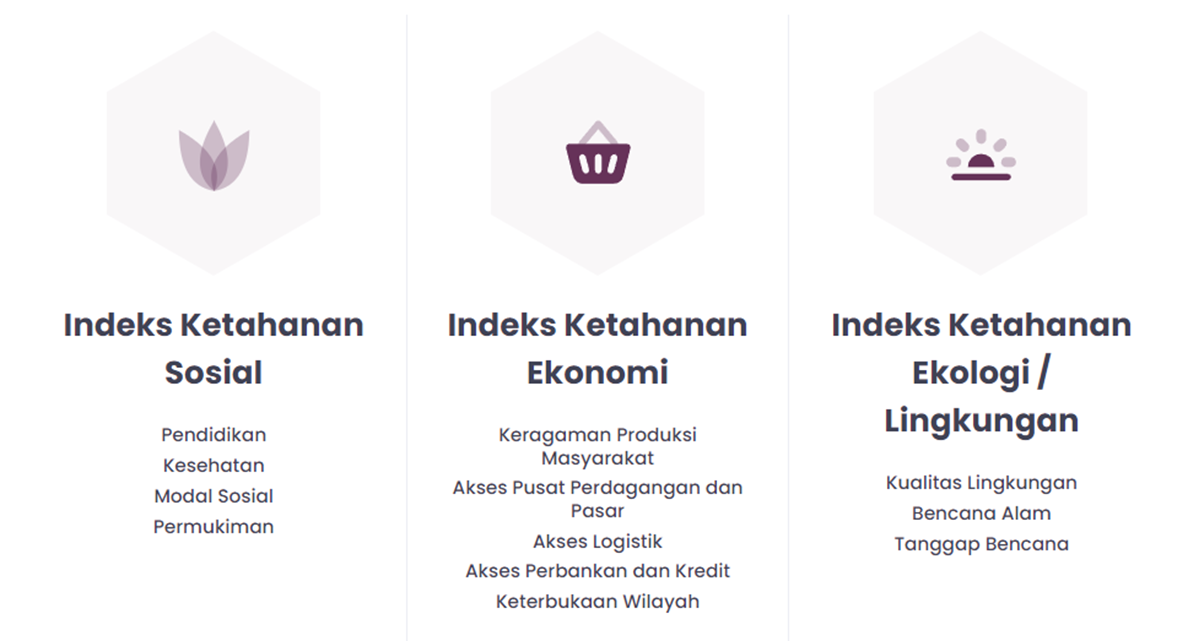

In [19]:
import tensorflow as tf
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from alibi.datasets import load_cats
from alibi.explainers import AnchorImage
import fastai
from fastai.vision.all import *
import pandas as pd
from PIL import Image
import PIL
import torchvision.transforms as T

In [20]:
from IPython.display import clear_output

In [21]:
path2img = 'C:/Users/jwst2/Python/tesis/jpg/general desa sentinel ES/3201140006.jpg'

In [22]:
datapath = "C:/Users/jwst2/Python/tesis/jpg/IDM/02. Desa Sentinel 10m ES/"
modelpath = "C:/Users/jwst2/Python/tesis/idm/models/Desa densenet sentinel 10m ES.pkl"
imagepath = "C:/Users/jwst2/Python/tesis/jpg/general desa sentinel ES/"
imagepath2 = "C:/Users/jwst2/Python/tesis/jpg/general desa sentinel 10m tc/"


In [23]:
img = PILImage.create(path2img)

In [24]:
image_shape = (224, 224, 3)
data, labels = load_cats(target_size=image_shape[:2], return_X_y=True)
print(f'Images shape: {data.shape}')

Images shape: (4, 224, 224, 3)


In [25]:
model = load_learner(modelpath)

In [26]:
def predict_fn(x):
    z = x[0].astype(np.uint8)
    z = PILImage.create(z)
    output = model.predict(z)[2].numpy()
    for i in range(1,x.shape[0]):
        y = x[i].astype(np.uint8)
        y = PILImage.create(y)
        output = np.append(output,model.predict(y)[2].numpy(),axis= 0)
    return output.reshape(-1, 2)

### Interpretasi dengan Anchor

In [6]:
idm = pd.read_csv("C:/Users/jwst2/Python/tesis/dataset/newdata_edit.csv")
idm = idm.drop_duplicates("bps_kelurahan_kode")

In [7]:
idm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5929 entries, 0 to 5928
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   kemendagri_kelurahan_kode  5929 non-null   int64  
 1   bps_kelurahan_kode         5928 non-null   float64
 2   status                     5312 non-null   object 
 3   bps_kelurahan_nama         5809 non-null   object 
 4   kemendagri_kelurahan_nama  5929 non-null   object 
 5   id                         5929 non-null   int64  
 6   kemendagri_provinsi_kode   5929 non-null   int64  
 7   kemendagri_kota_kode       5929 non-null   float64
 8   kemendagri_kecamatan_kode  5929 non-null   object 
 9   kemendagri_provinsi_nama   5929 non-null   object 
 10  kemendagri_kota_nama       5929 non-null   object 
 11  kemendagri_kecamatan_nama  5929 non-null   object 
 12  bps_provinsi_kode          5809 non-null   float64
 13  bps_kota_kode              5809 non-null   float

In [167]:
path = imagepath+ '3201130012.jpg'

In [168]:
pval = 0.9
nseg = 9
def explain_idm(explainer,path, pval = 0.9 , nseg= 9):
    image_shape = (224, 224,3)
    segmentation_fn = 'slic'
    kwargs = {'n_segments': nseg, 'compactness': 20, 'sigma': .5}
    explainer = AnchorImage(predict_fn, image_shape, segmentation_fn=segmentation_fn,
                        segmentation_kwargs=kwargs, images_background=None)
    img_pil = Image.open(path)
    img_pil = np.asarray(img_pil)
    fig, ax = plt.subplots(1, 3,figsize=(15,15))
    explanation = explainer.explain(img_pil, threshold=pval, p_sample=1)
    clear_output(wait=True)
    ax[0].imshow(img_pil)
    ax[0].title.set_text(idm[idm.bps_kelurahan_kode == int((path)[-14:-4])]["bps_kelurahan_nama"].to_list()[0]+" ("+model.predict(PILImage.create(path))[0]+")")
    ax[1].imshow(explanation.anchor)
    ax[1].title.set_text("Anchor (P ="+str(pval)+")")
    ax[2].imshow(explanation.segments)
    ax[2].title.set_text("N Segments (slic) : "+str(nseg))


 Komponen IKS yang dapat dijelaskan melalui citra adalah komponen pemukiman. Untuk menjelaskan komponen tersebut pada model deep learning digunakan Anchor. Untuk faktor pemukiman, model deep learning mempelajari wilayah maju mandiri dengan melalui area dengan kepadatan pemukiman penduduk tinggi seperti pada Gambar 22. Bangunan-bangunan yang berukuran lebih besar tidak dipelajari sebagai wilayah Maju mandiri, kecuali untuk desa dengan jumlah bangunan berukuran besarnya lebih banyak dibandingkan pemukiman dengan ukuran bangunan kecil. Sehingga deep learning sangat baik untuk mengklasifikasikan Indikator yang sangat erat hubungannya dengan pola pemukiman penduduk.

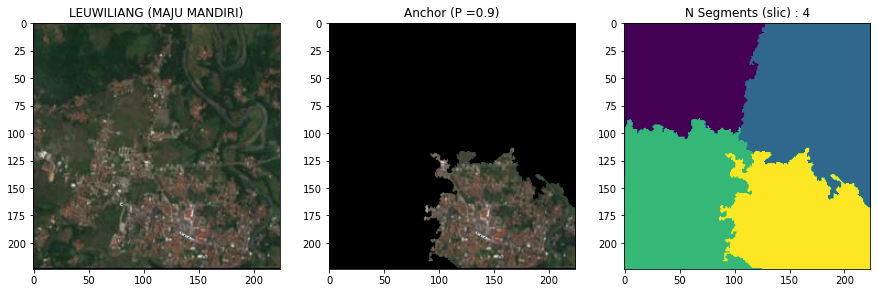

In [176]:
explain_idm(explainer,imagepath +'3201020018.jpg',nseg = 4)


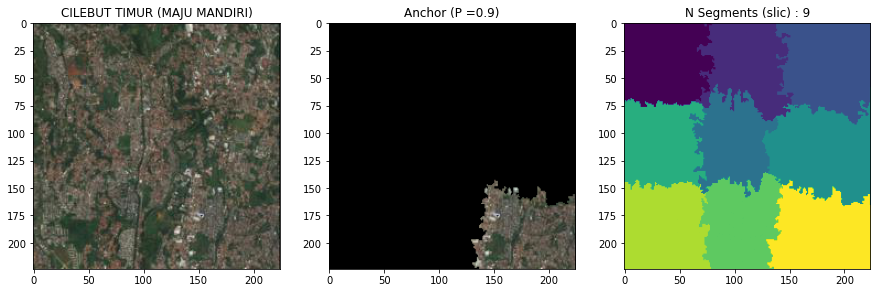

In [148]:
explain_idm(explainer,imagepath+ '3201130012.jpg')

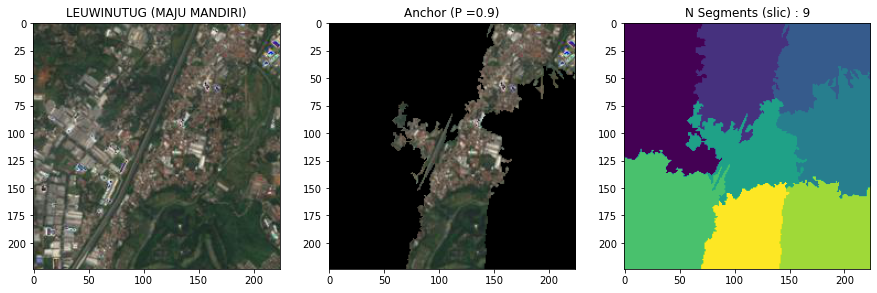

In [149]:
explain_idm(explainer,imagepath +'3201200006.jpg')

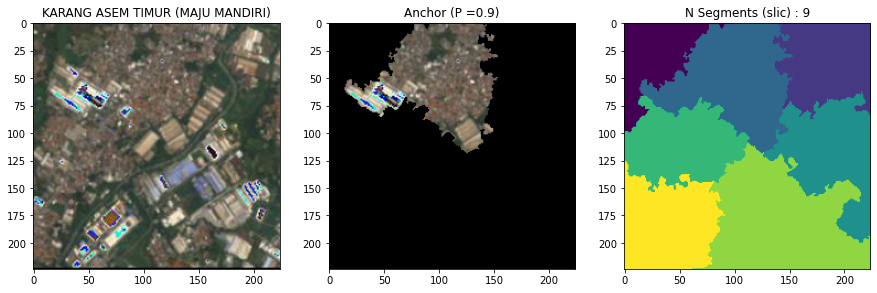

In [150]:
explain_idm(explainer,imagepath +'3201200009.jpg')

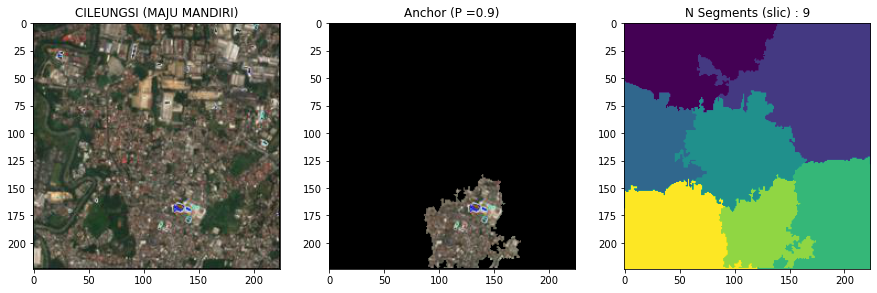

In [151]:
explain_idm(explainer,imagepath +'3201180018.jpg')

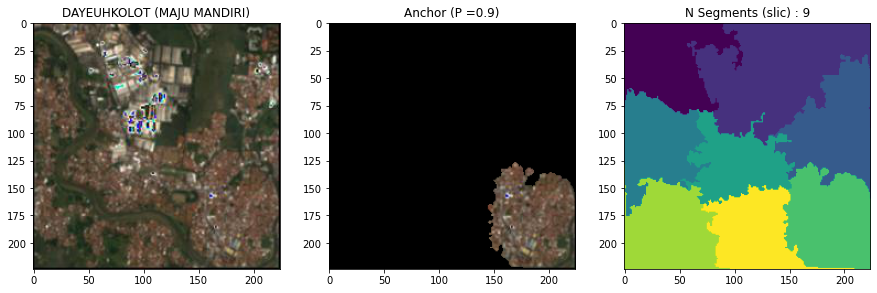

In [152]:
explain_idm(explainer,imagepath+ '3204270004.jpg')

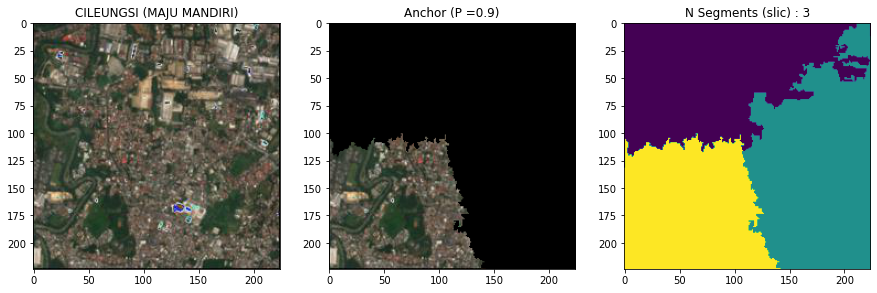

In [175]:
explain_idm(explainer,imagepath +'3201180018.jpg',nseg = 3)

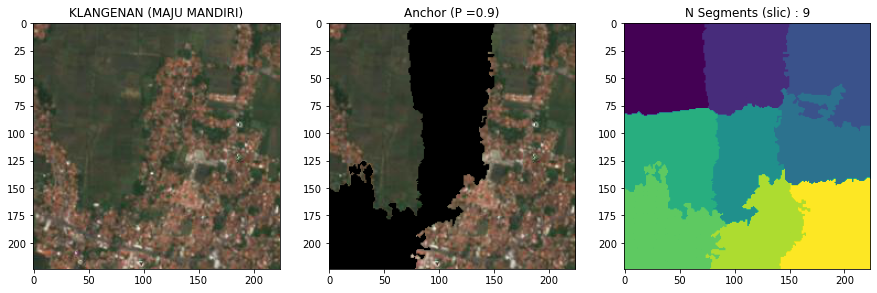

In [154]:
explain_idm(explainer,imagepath +'3209190002.jpg')

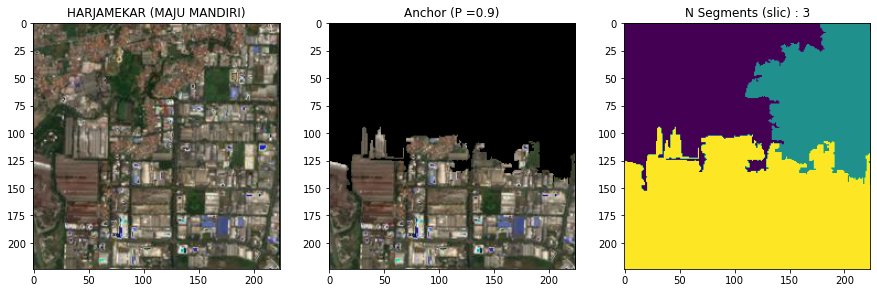

In [172]:
explain_idm(explainer,imagepath +'3216061002.jpg',nseg = 3)

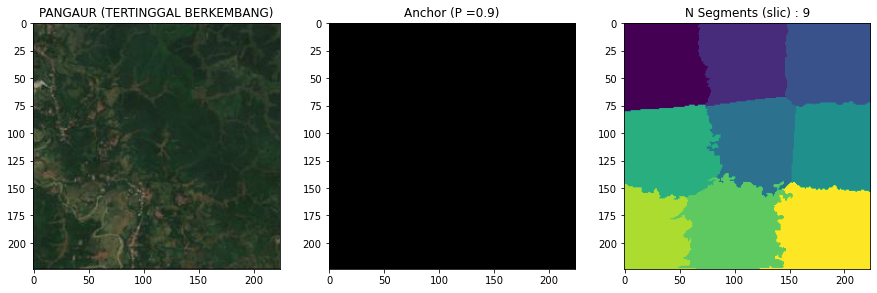

In [ ]:
explain_idm(explainer,imagepath +'3201280017.jpg')

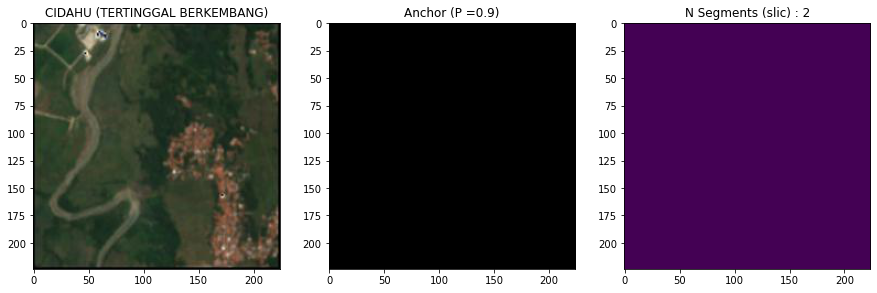

In [171]:
explain_idm(explainer,imagepath +'3214090010.jpg',nseg = 2)

### Korelasi Vegetasi dan IKL

Komponen IKL dapat didekati dengan persentase vegetasi. Lingkungan dengan banyak vegetasi diasumsikan akan memiliki kualitas lingkungan yang lebih baik. Sehingga seharusnya terdapat hubungan linear antara IKL dan persentase vegetasi. Dari hasil analisis, korelasi IKL dan persentase vegetasi hanya sebesar 0.025 yang menunjukkan tidak adanya asosiasi linear antara kedua variabel tersebut. Hal ini dikarenakan IKL juga disusun oleh faktor bencana alam dan ketanggapan sebuah desa terhadap bencana alam yang tidak dapat diamati hanya dari sisi vegetasi. 

In [8]:
import seaborn as sns

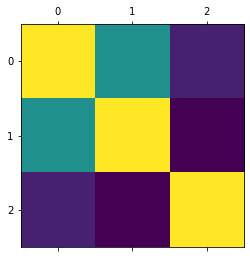

In [9]:
plt.matshow(idm[["iks","ike","ikl"]].corr())
plt.show()

In [10]:
corr = idm[["iks","ike","ikl"]].corr()

<AxesSubplot:>

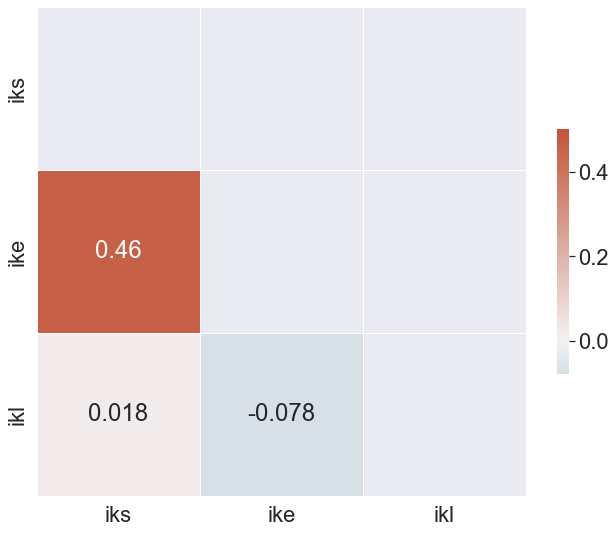

In [11]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale = 2)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

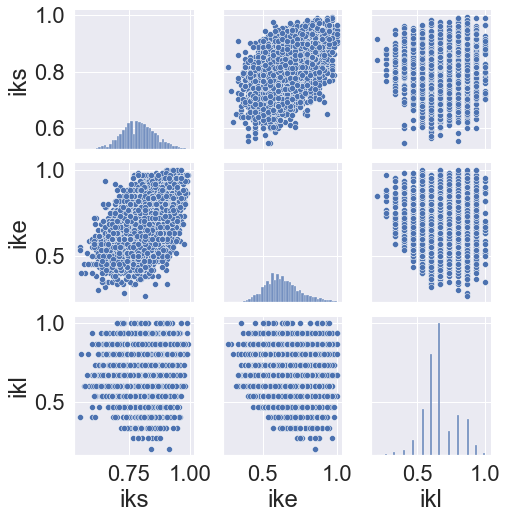

In [12]:
sns.pairplot(idm[["iks","ike","ikl"]])

In [ ]:
https://web.situbondokab.go.id/berita/tindak-lanjut-fasilitasi-evaluasi-perkembangan-desa-indeks-desa-membangun-idm

In [ ]:
https://idm.kemendesa.go.id/view/detil/1/tentang-idm

In [15]:
idm.head()

kemendagri_kelurahan_kode  bps_kelurahan_kode      status  \
0                 3201212001        3.201010e+09  BERKEMBANG   
1                 3201212004        3.201010e+09  BERKEMBANG   
2                 3201212003        3.201010e+09  BERKEMBANG   
3                 3201212002        3.201010e+09  BERKEMBANG   
4                 3201212007        3.201010e+09  BERKEMBANG   

  bps_kelurahan_nama kemendagri_kelurahan_nama   id  kemendagri_provinsi_kode  \
0           MALASARI                  MALASARI  238                        32   
1       BANTAR KARET               BANTARKARET  241                        32   
2            CISARUA                   CISARUA  240                        32   
3       CURUG BITUNG               CURUGBITUNG  239                        32   
4           NANGGUNG                  NANGGUNG  244                        32   

   kemendagri_kota_kode kemendagri_kecamatan_kode kemendagri_provinsi_nama  \
0                 32.01                  32.01.21               JAWA BARAT   
1                 32.01                  32.01.21               JAWA BARAT   
2                 32.01                  32.01.21               JAWA BARAT   
3                 32.01                  32.01.21               JAWA BARAT   
4                 32.01                  32.01.21               JAWA BARAT   

   ... status_adm         nama  id_kecamatan  nama_kecamatan  id_kabupaten  \
0  ...        NaN     MALASARI      320121.0        NANGGUNG        3201.0   
1  ...        NaN  BANTARKARET      320121.0        NANGGUNG        3201.0   
2  ...        NaN      CISARUA      320121.0        NANGGUNG        3201.0   
3  ...        NaN  CURUGBITUNG      320121.0        NANGGUNG        3201.0   
4  ...        NaN     NANGGUNG      320121.0        NANGGUNG        3201.0   

    nama_kabupaten     iks     ike     ikl  avg_idm  
0  KABUPATEN BOGOR  0.7314  0.4833  0.6000   0.6049  
1  KABUPATEN BOGOR  0.7771  0.6500  0.6000   0.6757  
2  KABUPATEN BOGOR  0.7200  0.5500  0.6000   0.6233  
3  KABUPATEN BOGOR  0.7657  0.6333  0.5333   0.6441  
4  KABUPATEN BOGOR  0.7543  0.6333  0.6000   0.6625  

[5 rows x 31 columns]

In [30]:
idm["softmax"] = 0.0

In [40]:
idm

kemendagri_kelurahan_kode  bps_kelurahan_kode      status  \
0                    3201212001        3.201010e+09  BERKEMBANG   
1                    3201212004        3.201010e+09  BERKEMBANG   
2                    3201212003        3.201010e+09  BERKEMBANG   
3                    3201212002        3.201010e+09  BERKEMBANG   
4                    3201212007        3.201010e+09  BERKEMBANG   
...                         ...                 ...         ...   
5924                 3279042002        3.279040e+09     MANDIRI   
5925                 3279042001        3.279040e+09     MANDIRI   
5926                 3279041004        3.279040e+09         NaN   
5927                 3279042003        3.279040e+09     MANDIRI   
5928                 3207011005                 NaN         NaN   

     bps_kelurahan_nama kemendagri_kelurahan_nama    id  \
0              MALASARI                  MALASARI   238   
1          BANTAR KARET               BANTARKARET   241   
2               CISARUA                   CISARUA   240   
3          CURUG BITUNG               CURUGBITUNG   239   
4              NANGGUNG                  NANGGUNG   244   
...                 ...                       ...   ...   
5924           REJASARI                  REJASARI  5953   
5925         LANGENSARI                LANGENSARI  5952   
5926          MUKTISARI                 MUKTISARI  5955   
5927       WARINGINSARI              WARINGINSARI  5954   
5928                NaN                   BENTENG  2259   

      kemendagri_provinsi_kode  kemendagri_kota_kode  \
0                           32                 32.01   
1                           32                 32.01   
2                           32                 32.01   
3                           32                 32.01   
4                           32                 32.01   
...                        ...                   ...   
5924                        32                 32.79   
5925                        32                 32.79   
5926                        32                 32.79   
5927                        32                 32.79   
5928                        32                 32.07   

     kemendagri_kecamatan_kode kemendagri_provinsi_nama  ... id_kecamatan  \
0                     32.01.21               JAWA BARAT  ...     320121.0   
1                     32.01.21               JAWA BARAT  ...     320121.0   
2                     32.01.21               JAWA BARAT  ...     320121.0   
3                     32.01.21               JAWA BARAT  ...     320121.0   
4                     32.01.21               JAWA BARAT  ...     320121.0   
...                        ...                      ...  ...          ...   
5924                  32.79.04               JAWA BARAT  ...     327904.0   
5925                  32.79.04               JAWA BARAT  ...     327904.0   
5926                  32.79.04               JAWA BARAT  ...          NaN   
5927                  32.79.04               JAWA BARAT  ...     327904.0   
5928                  32.07.01               JAWA BARAT  ...          NaN   

     nama_kecamatan  id_kabupaten   nama_kabupaten     iks     ike     ikl  \
0          NANGGUNG        3201.0  KABUPATEN BOGOR  0.7314  0.4833  0.6000   
1          NANGGUNG        3201.0  KABUPATEN BOGOR  0.7771  0.6500  0.6000   
2          NANGGUNG        3201.0  KABUPATEN BOGOR  0.7200  0.5500  0.6000   
3          NANGGUNG        3201.0  KABUPATEN BOGOR  0.7657  0.6333  0.5333   
4          NANGGUNG        3201.0  KABUPATEN BOGOR  0.7543  0.6333  0.6000   
...             ...           ...              ...     ...     ...     ...   
5924     LANGENSARI        3279.0      KOTA BANJAR  0.9143  0.7333  0.9333   
5925     LANGENSARI        3279.0      KOTA BANJAR  0.9314  0.7667  0.9333   
5926            NaN           NaN              NaN     NaN     NaN     NaN   
5927     LANGENSARI        3279.0      KOTA BANJAR  0.8971  0.7333  0.8667   
5928            NaN           NaN   

In [17]:
def greenCalculator(path):
    # Load image and convert to HSV
    im = Image.open(path).convert('HSV')
    # Extract Hue channel and make Numpy array for fast processing
    Hue = np.array(im.getchannel('H'))
    # Make mask of zeroes in which we will set greens to 1
    mask = np.zeros_like(Hue, dtype=np.uint8) 
    # Set all green pixels to 1
    mask[(Hue>60) & (Hue<120)] = 1 
    # Now print percentage of green pixels
    return (mask.mean()*100)

In [ ]:
res_prob = []
res_cat = []
for i in idm.bps_kelurahan_kode.to_list():
    pred = model.predict(PILImage.create(imagepath+str(i)[:10]+".jpg"))
    res_prob.append(pred[2].numpy()[0])
    res_cat.append(pred[0])
    clear_output(wait=True)

In [42]:
res_prob.append(None)
res_cat.append(None)

In [43]:
idm["softmax"] = res_prob
idm["pred_class"] = res_cat

In [46]:
imagepathnd = "C:/Users/jwst2/Python/tesis/jpg/general ndvi desa ES/"

In [ ]:
res_vi = []
for i in idm.bps_kelurahan_kode.to_list():
   res_vi.append(greenCalculator(imagepathnd+str(i)[:10]+".jpg"))


In [49]:
res_vi.append(None)

In [50]:
idm["vegetation_percentage"] = res_vi

In [51]:
idm[["vegetation_percentage","ikl"]].corr()

vegetation_percentage       ikl
vegetation_percentage               1.000000  0.025235
ikl                                 0.025235  1.000000

<AxesSubplot:>

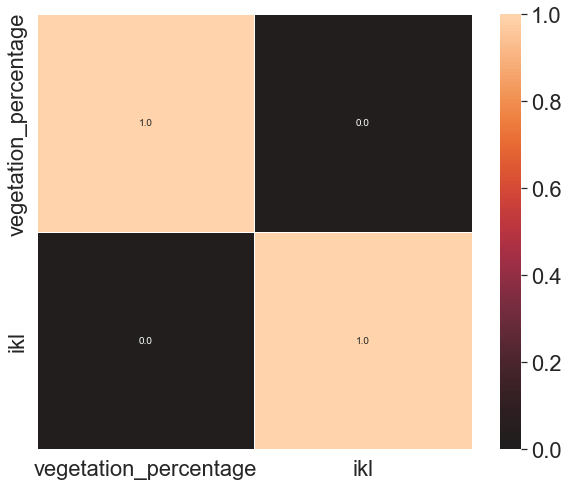

In [53]:
fig, ax = plt.subplots( figsize=(10,8) )
sns.heatmap(idm[["vegetation_percentage","ikl"]].corr(),
            annot=True, center=0,
            linewidths=.5, square=True,
            vmin=0, vmax=1, fmt='0.1f')

Dari analisis tersebut, terdapat banyak hal yang tidak dapat diamati oleh citra untuk melakukan klasifikasi IDM desa seperti yang dilakukan manusia. Faktor ini juga menjelaskan lebih rendahnya akurasi klasifikasi IDM dibandingkan urban/rural. Walaupun demikian asosiasi linear antara IKS dan IKE yang dapat dilihat pada Gambar 23 dapat membantu model mempelajari tingkat ekonomi sebuah desa melalui pola pemukiman. Untuk IKL dibutuhkan informasi yang lebih dari pola pemukiman dan persentase vegetasi. Data-data yang berhubungan dengan bencana dan tingkat ekonomi sebuah desa dapat ditambahkan pada penelitian selanjutnya untuk mengurangi bisa model klasifikasi IDM.